# Decision Tree for Regression

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
dataset = pd.read_csv("C:/Users/Sony/Desktop/Data-Science-Training/4. Regression/Regression-PPT/Salary_Data.csv")

In [3]:
dataset.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# To Seperate the Indepdent and Depdendent Var

In [5]:
X = dataset.iloc[ : , 0:1] # Independent

In [6]:
y = dataset.iloc[ :, 1:2] # Dependent Variable

In [7]:
X.head()

YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2

In [8]:
y.head()

Salary
0  39343.0
1  46205.0
2  37731.0
3  43525.0
4  39891.0

# Create Training set - 80% and Test set - 20% on this data

In [9]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test  = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [18]:
X_train.shape

(24, 1)

In [19]:
X_test.shape

(6, 1)

In [20]:
y_train.shape, y_test.shape

((24, 1), (6, 1))

In [21]:
X_test

YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7

Feature Scaling is not done due to single column in X-Independent Variable
More than 2 columns, I would have used Feature Scaling
1. Standard Scaler
2. Normal Scaler

# Model Building - Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor()

In [24]:
# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
# Test the model - Prediction
y_pred = regressor.predict(X_test)

In [26]:
y_pred

array([ 46205. , 121872. ,  56375.5,  56375.5, 112635. , 105582. ])

In [27]:
y_test.values

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

In [30]:
print('Accuracy : ', regressor.score(X_test, y_test) * 100)

Accuracy :  97.64754205531827


# Plot the Decision Tree

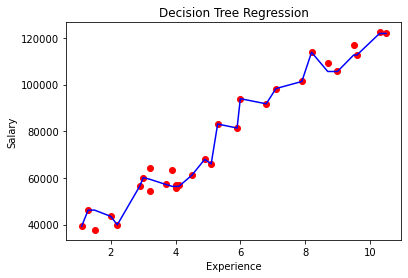

In [37]:
#### Visualize my tree
# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, regressorDT.predict(X_grid), color = 'blue')
plt.plot(X, regressor.predict(X), color = 'blue') # Line graph
plt.title('Decision Tree Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

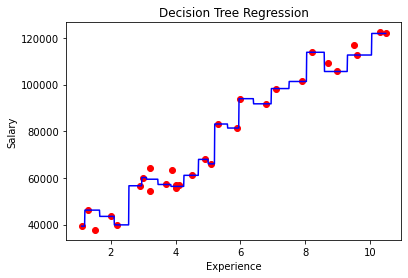

In [38]:
#### Visualize my tree
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.plot(X, regressor.predict(X), color = 'blue') # Line graph
plt.title('Decision Tree Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### Decision Tree 

In [39]:
from sklearn.tree import plot_tree

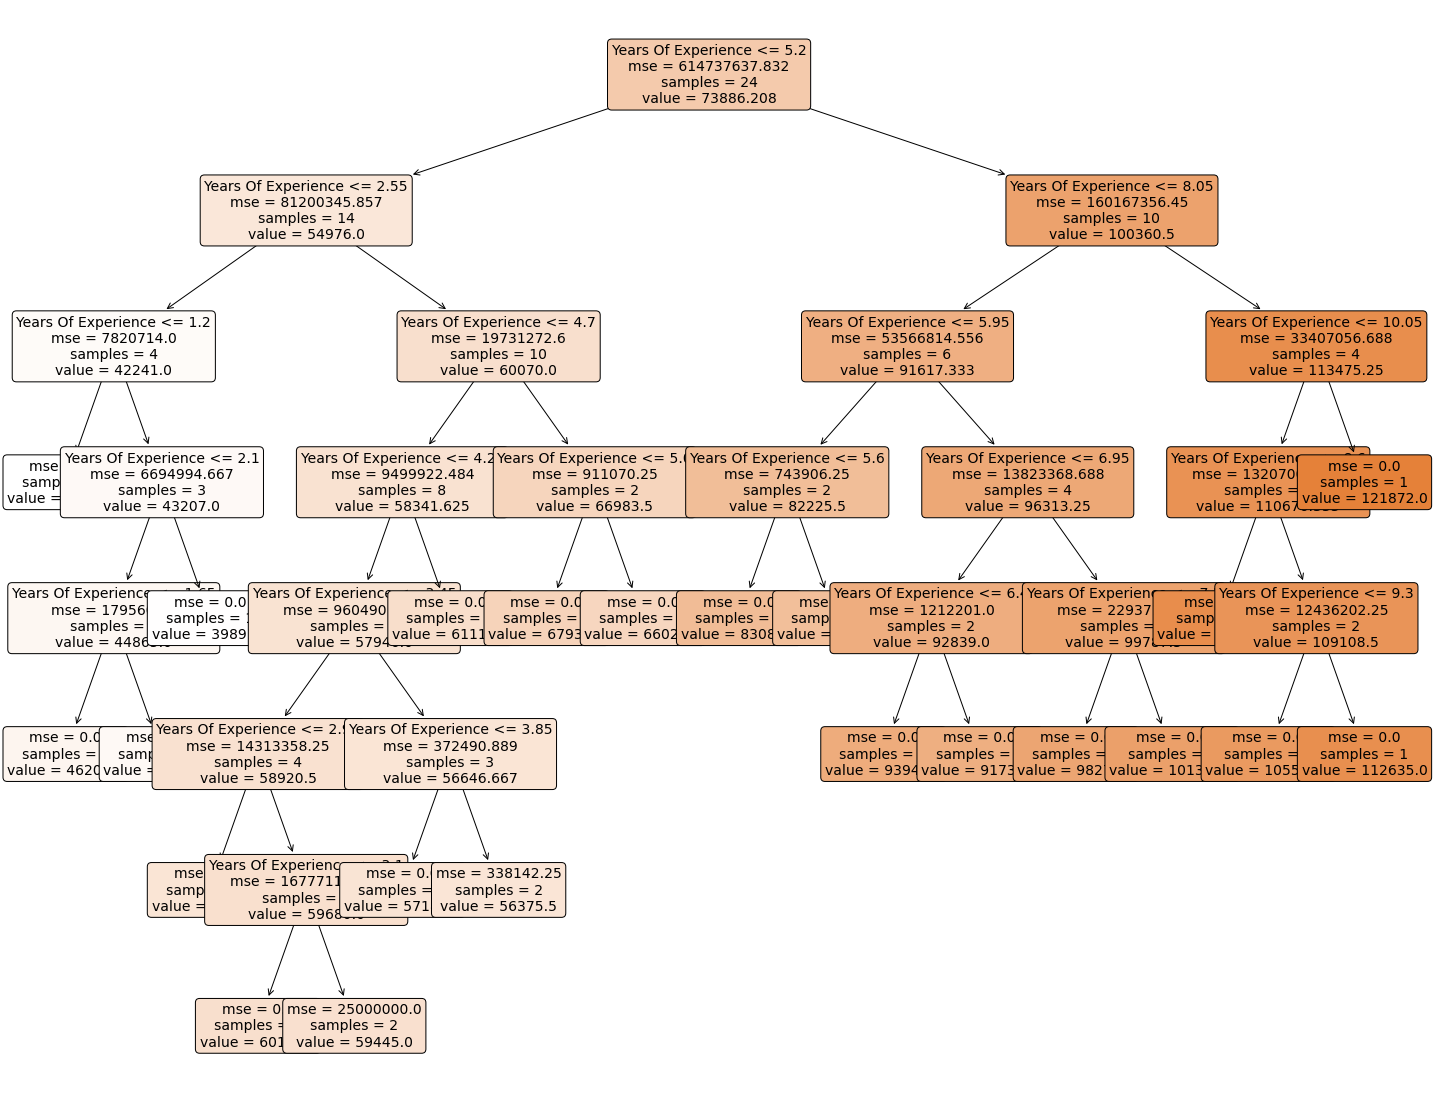

In [44]:
plt.figure(figsize=(25,20))
plot_tree(regressor,
         feature_names=['Years Of Experience'],
         class_names = 'Salary',
          filled=True,
          rounded=True,
          fontsize=14
         )
plt.show()